### testing lds fit on locomotion data

In [3]:
import pandas as pd
import sklearn
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.gridspec import GridSpec

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names = ["windows blue",
               "red",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "mint",
               "light cyan",
               "steel blue",
               "forest green",
               "pastel purple",
               "salmon",
               "dark brown"]

colors = sns.xkcd_palette(color_names)

import ssm
from ssm.util import random_rotation
from ssm.plots import plot_dynamics_2d

# Specify whether or not to save figures
save_figures = False

In [16]:
df = pd.read_csv('/home/diogo/careylab/code/ssm/data/T10.csv')
df.interpolate(inplace=True)

In [35]:
orig_data = df[['FRx', 'FRy', 'FRz', 'HRx', 'HRy', 'HRz', 'FLx', 'FLy', 'FLz', 'HLx', 'HLy', 'HLz']].values
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(orig_data)
data = scaler.transform(orig_data)

In [162]:
# make LDS
obs_dim    = emissions.shape[1]
state_dim  = 3
lds = ssm.LDS(obs_dim, state_dim, emissions="gaussian")

elbos, q = lds.fit(data, method="laplace_em", num_iters=100)

# Get the posterior mean of the continuous states
state_means = q.mean_continuous_states[0]

  0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

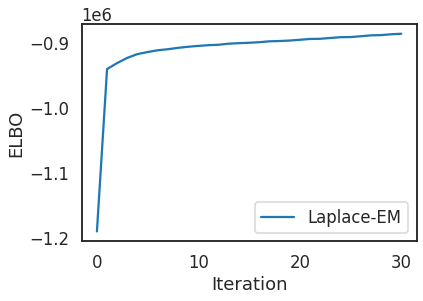

In [21]:
# Plot the ELBOs
plt.plot(elbos, label="Laplace-EM")
plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.legend()

In [37]:
# Smooth the data under the variational posterior
smoothed_obs = lds.smooth(state_means, data)

In [38]:

paw_colors_sns = [sns.color_palette('deep')[3], sns.color_palette('deep')[6],
                    sns.color_palette('deep')[0], sns.color_palette('deep')[9]]
color_list = [paw_colors_sns[0], paw_colors_sns[0], paw_colors_sns[0], 
              paw_colors_sns[1], paw_colors_sns[1], paw_colors_sns[1],
              paw_colors_sns[2], paw_colors_sns[2], paw_colors_sns[2],
              paw_colors_sns[3], paw_colors_sns[3], paw_colors_sns[3]]

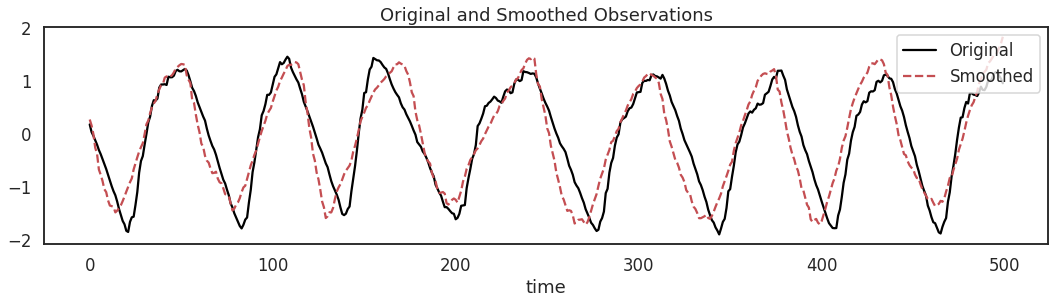

In [98]:
# Plot the smoothed emissions
plt.figure(figsize=(18,4))

interval = np.arange(9000,9500)

for n in range(1):
    plt.plot(data[interval, n] + 4 * n, '-k', label="Original" if n == 0 else None)
    plt.plot(smoothed_obs[interval, n] + 4 * n, '--', color=color_list[n], label="Smoothed" if n == 0 else None)
plt.legend()
plt.xlabel("time")
plt.title("Original and Smoothed Observations")
plt.show()

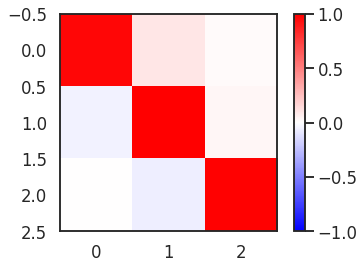

In [55]:
# plot the dynamics and the observations matrix
plt.figure()
plt.imshow(lds.dynamics.A, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()

In [49]:
w, v = np.linalg.eig(lds.dynamics.A)
w

array([0.98830567+0.08273373j, 0.98830567-0.08273373j,
       0.99320797+0.j        ])

AttributeError: 'AxesSubplot' object has no attribute 'set_xlabels'

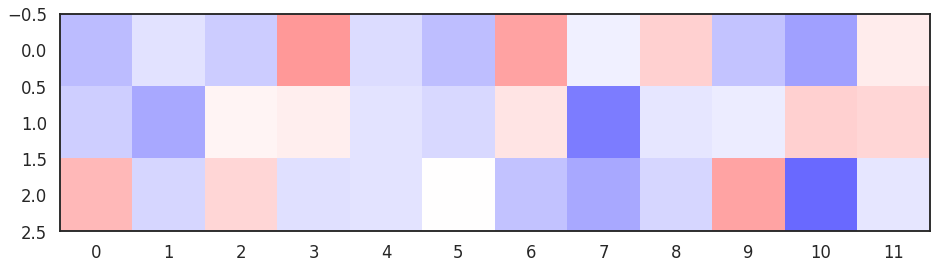

In [105]:
fig = plt.figure(figsize=(18,4))
plt.imshow(lds.emissions.Cs.squeeze().T, cmap='bwr',vmin=-1, vmax=1)
plt.xticks(np.arange(12))
#ax = fig.axes[0]
#ax.set_xlabels(['FRx', 'FRy', 'FRz', 'HRx', 'HRy', 'HRz', 'FLx', 'FLy', 'FLz', 'HLx', 'HLy', 'HLz'])
plt.colorbar()

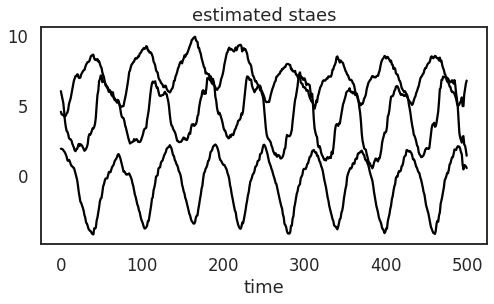

In [61]:
# Plot the smoothed emissions
plt.figure(figsize=(8,4))

interval = np.arange(10000,10500)

for n in range(state_means.shape[1]):
    plt.plot(state_means[interval, n] + 4 * n, '-k')
plt.xlabel("time")
plt.title("estimated states")
plt.show()

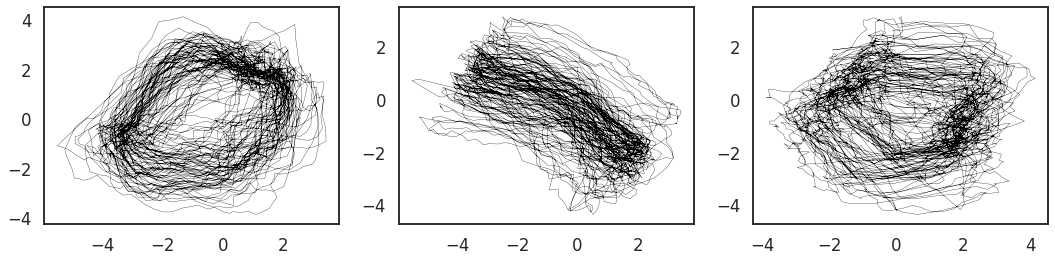

In [96]:
import itertools
combinations = list(itertools.combinations(np.arange(state_means.shape[1]), 2))


interval = np.arange(6000,10500)


fig, ax = plt.subplots(1,3)
fig.set_size_inches(18, 4)
ax = ax.flatten()

for ii in range(len(ax)):
    plt.sca(ax[ii])
    plt.plot(state_means[interval, combinations[ii][0]], state_means[interval, combinations[ii][1]], 
             '-k', linewidth=0.3)
plt.show()

In [132]:
# fit on unseen data of T11
df11 = pd.read_csv('/home/diogo/careylab/code/ssm/data/T11.csv')
df11.interpolate(inplace=True)
unseen_data = df11[['FRx', 'FRy', 'FRz', 'HRx', 'HRy', 'HRz', 'FLx', 'FLy', 'FLz', 'HLx', 'HLy', 'HLz']].values
unseen_data = scaler.transform(unseen_data)


In [133]:
# fitting multiple trials?
# make LDS
obs_dim    = emissions.shape[1]
state_dim  = 3
lds = ssm.LDS(obs_dim, state_dim, emissions="gaussian")

concat_data = [data, unseen_data]

In [134]:
elbos, q = lds.fit(concat_data, method="laplace_em", num_iters=100)

# Get the posterior mean of the continuous states


  0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

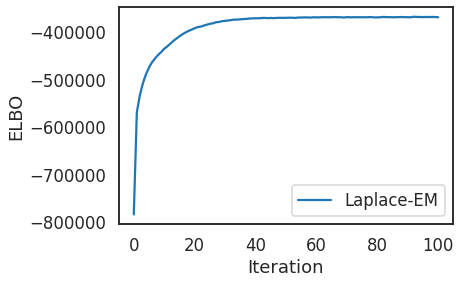

In [135]:
# Plot the ELBOs
plt.plot(elbos, label="Laplace-EM")
plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.legend()

In [136]:
elbos.shape

(101,)

In [137]:
len(q.mean_continuous_states)

2

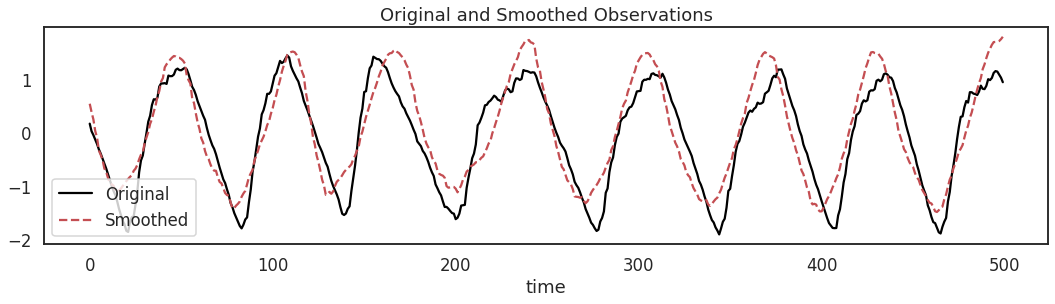

In [138]:
trial_idx = 0
state_means = q.mean_continuous_states[trial_idx]
smoothed_obs10 = lds.smooth(state_means, concat_data[trial_idx])
# Plot the smoothed emissions
plt.figure(figsize=(18,4))

interval = np.arange(9000,9500)

for n in range(1):
    plt.plot(concat_data[trial_idx][interval, n] + 4 * n, '-k', label="Original" if n == 0 else None)
    plt.plot(smoothed_obs10[interval, n] + 4 * n, '--', color=color_list[n], label="Smoothed" if n == 0 else None)
plt.legend()
plt.xlabel("time")
plt.title("Original and Smoothed Observations")
plt.show()

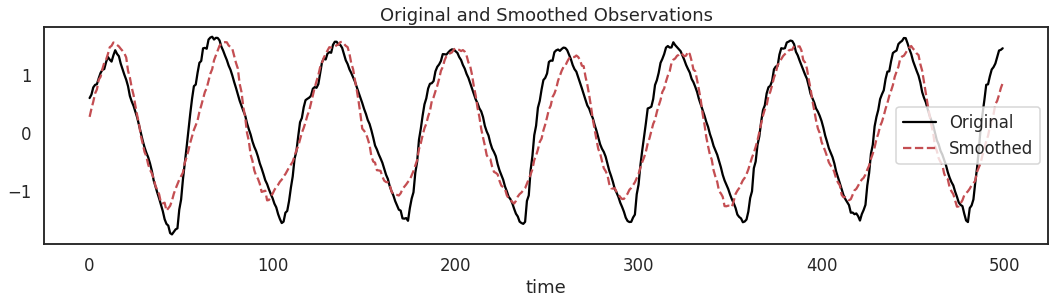

In [139]:
trial_idx = 1
state_means = q.mean_continuous_states[trial_idx]
smoothed_obs11 = lds.smooth(state_means, concat_data[trial_idx])
# Plot the smoothed emissions
plt.figure(figsize=(18,4))

interval = np.arange(9000,9500)

for n in range(1):
    plt.plot(unseen_data[interval, n] + 4 * n, '-k', label="Original" if n == 0 else None)
    plt.plot(smoothed_obs11[interval, n] + 4 * n, '--', color=color_list[n], label="Smoothed" if n == 0 else None)
plt.legend()
plt.xlabel("time")
plt.title("Original and Smoothed Observations")
plt.show()

In [120]:
trial_idx

1

In [142]:
help(ssm.LDS.approximate_posterior)

Help on function wrapper in module ssm.util:

wrapper(self, datas, inputs=None, masks=None, tags=None, **kwargs)



In [143]:
# Fit an approximate posterior to data, without updating model params.
'''
Fit an approximate posterior to data, without updating model params.

        This function computes the posterior over discrete and continuous states
        with model parameters fixed. This can be thought of as extending the Kalman
        Smoother (which computes the state distribution in an LDS) to the SLDS case.
        If the model is an LDS, and the laplace-em method is used with a structured_meanfield
        posterior, this function will be equivalent to running a Kalman Smoother.
'''
__, posterior = lds.approximate_posterior(unseen_data)

  0%|          | 0/100 [00:00<?, ?it/s]

In [157]:
# estimate states in unseen data without updating the model
t12 = pd.read_csv('/home/diogo/careylab/code/ssm/data/T12.csv')
t12.interpolate(inplace=True)
t12 = t12[['FRx', 'FRy', 'FRz', 'HRx', 'HRy', 'HRz', 'FLx', 'FLy', 'FLz', 'HLx', 'HLy', 'HLz']].values
t12 = scaler.transform(t12)


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# redo the model fit only on trial 10 
lds = ssm.LDS(obs_dim, state_dim, emissions="gaussian")
elbos, q = lds.fit(data, method="laplace_em", num_iters=100)
# and then estimate the states and smooth on trial 11
elbo_un, q_un = lds.approximate_posterior(unseen_data)

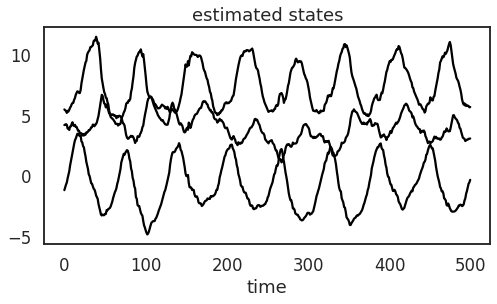

In [164]:
estimated_states_unseen = q_un.mean_continuous_states[0]
plt.figure(figsize=(8,4))

interval = np.arange(9000,9500)

for n in range(estimated_states_unseen.shape[1]):
    plt.plot(estimated_states_unseen[interval, n] + 4 * n, '-k')
plt.xlabel("time")
plt.title("estimated states")
plt.show()

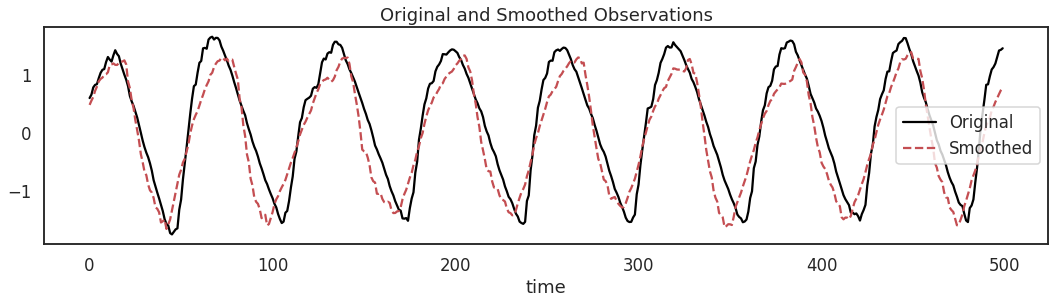

In [168]:
plt.figure(figsize=(18,4))
interval = np.arange(9000,9500)

smoothed_observations = lds.smooth(estimated_states_unseen, unseen_data)

for n in range(1):
    plt.plot(unseen_data[interval, n] + 4 * n, '-k', label="Original" if n == 0 else None)
    plt.plot(smoothed_observations[interval, n] + 4 * n, '--', color=color_list[n], label="Smoothed" if n == 0 else None)
plt.legend()
plt.xlabel("time")
plt.title("Original and Smoothed Observations")
plt.show()